In [1]:
from rgb_anything_v1.dpt import RGBAnything
from torch import nn
import torch
import cv2
import numpy as np
import matplotlib.pyplot as plt
from torchvision.transforms import Compose
from cocoloader import cocoloader

xFormers not available
xFormers not available


In [2]:
model_configs = {
    'vits': {'encoder': 'vits', 'features': 64, 'out_channels': [48, 96, 192, 384]},
    'vitb': {'encoder': 'vitb', 'features': 128, 'out_channels': [96, 192, 384, 768]},
    'vitl': {'encoder': 'vitl', 'features': 256, 'out_channels': [256, 512, 1024, 1024]},
    'vitg': {'encoder': 'vitg', 'features': 384, 'out_channels': [1536, 1536, 1536, 1536]}
}


net = RGBAnything(**model_configs['vits'])

(numpy.ndarray, (1080, 2538, 3))

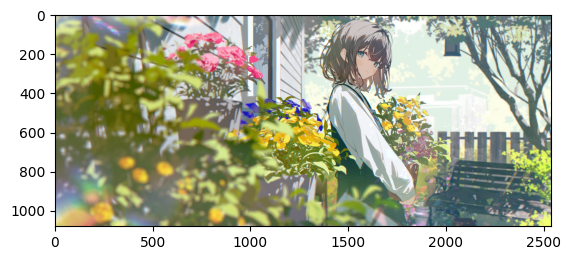

In [3]:
image_path = '2025_08_08_02_02_IMG_8783.png'
raw_img = cv2.imread(image_path)
img = cv2.cvtColor(raw_img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
type(img), img.shape

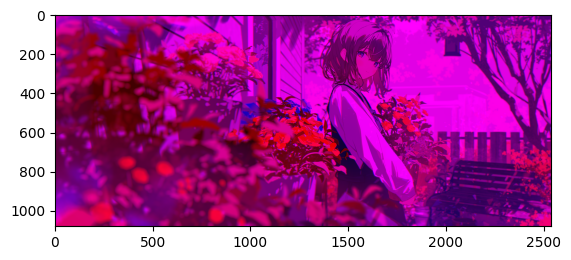

In [4]:
img_rb = img[:, :, [0, 2]]  # 提取红色和蓝色通道
img_r0b = img
img_r0b[:, :, 1] = 0  # 将绿色通道设为0
plt.imshow(img_r0b)

In [5]:
image, (h, w) = net.image2tensor(raw_img, input_size=518)
image.shape, h, w

(torch.Size([1, 2, 518, 924]), 3920, 7000)

In [9]:
def uniform(m):
    if type(m) in [nn.Linear, nn.Conv2d]:
        nn.init.xavier_uniform_(m.weight)
net.apply(uniform)

RGBAnything(
  (pretrained): DinoVisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(2, 384, kernel_size=(14, 14), stride=(14, 14))
      (norm): Identity()
    )
    (blocks): ModuleList(
      (0-11): 12 x NestedTensorBlock(
        (norm1): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (attn): MemEffAttention(
          (qkv): Linear(in_features=384, out_features=1152, bias=True)
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=384, out_features=384, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): LayerScale()
        (drop_path1): Identity()
        (norm2): LayerNorm((384,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=384, out_features=1536, bias=True)
          (act): GELU(approximate='none')
          (fc2): Linear(in_features=1536, out_features=384, bias=True)
          (drop): Dropout(p=0.0, inplace=False)
        

In [10]:
y = net(image)
y.shape, torch.max(y), torch.min(y), torch.mean(y)

(torch.Size([1, 518, 924]),
 tensor(2.7874, grad_fn=<MaxBackward1>),
 tensor(-3.6522, grad_fn=<MinBackward1>),
 tensor(0.7808, grad_fn=<MeanBackward0>))

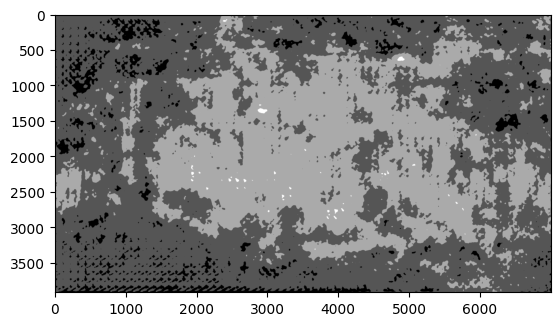

In [4]:
g_pred = net.infer_image(raw_img, input_size=518)
plt.imshow(g_pred, cmap='gray')

In [9]:
train_iter = cocoloader('data/train_small', batch_size=4)
batch = next(iter(train_iter))

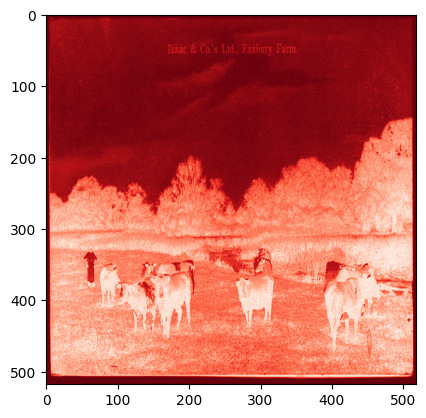

In [10]:
plt.imshow(np.array(batch[0][0][0]), cmap='Reds')

In [11]:
x = batch[0].to(torch.device('cuda'))
net = net.to(torch.device('cuda'))


In [12]:
net(x)

OutOfMemoryError: CUDA out of memory. Tried to allocate 172.00 MiB. GPU 0 has a total capacity of 8.00 GiB of which 0 bytes is free. Of the allocated memory 14.28 GiB is allocated by PyTorch, and 75.16 MiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

In [3]:
import torch
torch.log(0.05 / torch.tensor([1e8])) / 10 + 1

tensor([-1.1416])

In [3]:
import numpy as np
np.zeros((1, 2, 3))[:, :, 1].shape

(1, 2)